# Alcoholism data set (source = Wooldridge, Introductory Econometrics)

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import mglearn
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [3]:
# Load data set
alcohol = pd.read_csv("alcohol.txt")
# Remove squaredal terms - these terms i
alcohol.drop(['agesq','beertaxsq','cigtaxsq','ethanolsq','educsq'],axis=1,inplace=True)
alcohol.head()

,id,abuse,status,unemrate,age,educ,married,famsize,white,exhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
0,1,1,1,4.0,50,4,1,1,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,0,0
1,2,0,3,4.0,37,12,1,5,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
2,3,0,3,4.0,53,9,1,3,1,1,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
3,4,0,3,3.3,59,11,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,0,0,1,1
4,5,0,3,3.3,43,10,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,1,1,1,1


(array([8848.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

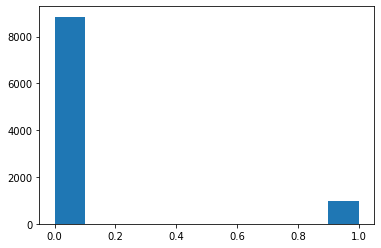

In [4]:
# this plot shows how unbalanced the data set is
plt.hist(alcohol.abuse)

# Some simple rebalancing

In [5]:
# generate special classes for types
count0, count1 = alcohol.abuse.value_counts()
aclass0 = alcohol[alcohol.abuse==0]
aclass1 = alcohol[alcohol.abuse==1]
print(count0)
print(count1)

8848
974


# Over sample class 1

8848


(array([8848.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8848.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

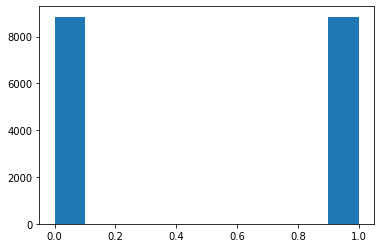

In [5]:
# over sampling for class 1
# Generate a new sample of count0 items of count1
over1 = aclass1.sample(count0,replace=True)
alcoholos = pd.concat([aclass0,over1],axis=0)
print(len(over1))
plt.hist(alcoholos.abuse)

# Undersample Class 0

In [6]:
# under sampling
# Generate sample of class 0 types matching number of class 1 types
under0 = aclass0.sample(count1)
alcoholus = pd.concat([under0,aclass1],axis=0)

(array([974.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

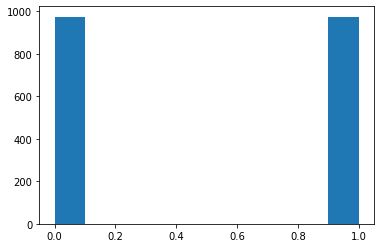

In [7]:
plt.hist(alcoholus.abuse)

In [8]:
# set up data, and check if balanced
y = alcoholus.abuse
X = alcoholus.iloc[:,2:33]
print(np.mean(y))
X.head()
# Note that the daa set is now perfectly balanced

0.5


,status,unemrate,age,educ,married,famsize,white,exhealth,vghealth,goodhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
3499,3,3.3,25,12,1,3,1,1,0,0,...,1,0,0.240,26.0,2.44998,0,0,0,1,1
2114,3,5.8,31,14,1,4,1,0,1,0,...,0,0,0.189,27.0,2.01552,0,0,0,1,1
1182,3,5.8,48,12,1,1,1,0,0,1,...,0,0,0.283,13.0,1.56486,0,0,0,1,1
6741,3,3.8,58,14,1,2,1,0,1,0,...,0,1,0.075,25.0,2.23350,0,0,0,1,1
5253,2,5.0,51,16,1,5,1,0,1,0,...,0,1,1.440,24.0,2.60184,0,1,1,1,0


### Example of two simple classifiers

**Problem 1:** Logistic regression

In [9]:
lc = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split( X, y )
lc.fit(X_train,y_train)
print(lc.score(X_train,y_train))
print(lc.score(X_test,y_test))

0.5941136208076659
0.5051334702258727


C= 1e-05
0.5106981519507187
0.48848049281314176
C= 0.0001
0.5506844626967831
0.5181930184804928
C= 0.001
0.5744284736481862
0.5541273100616015
C= 0.01
0.5774811772758385
0.5475154004106777
C= 0.1
0.5797467488021902
0.5469815195071869
C= 1.0
0.580691307323751
0.5492607802874744
C= 10.0
0.5803353867214237
0.5445790554414784
C= 100.0
0.582299794661191
0.5475359342915811
C= 1000.0
0.5803764544832307
0.5471868583162218
C= 10000.0
0.5798494182067077
0.5489322381930184
C= 100000.0
0.5795277207392198
0.547700205338809
C= 1000000.0
0.5796030116358658
0.5503285420944559
C= 10000000.0
0.5800958247775495
0.5459753593429157
C= 100000000.0
0.5793702943189597
0.5490965092402464
C= 1000000000.0
0.5807049965776865
0.5496303901437372


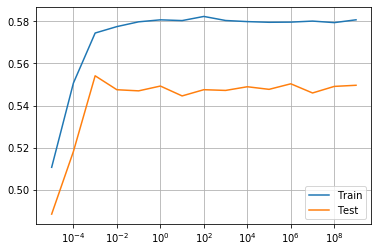

In [37]:
# Now manual grid search
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
trainMean = []
testMean  = []
CVal = []
Clist = np.power(10.,range(-5,10))
nmc = 100
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
for CParam in Clist:
    fullModel = make_pipeline(StandardScaler(), LogisticRegression(C=CParam,max_iter=1000))
    CVInfo = cross_validate(fullModel, X, y, cv=shuffle,return_train_score=True)
    print("C=",CParam)
    m1 = np.mean(CVInfo['train_score'])
    print(m1)
    CVal.append(CParam)
    trainMean.append(m1)
    m2 = np.mean(CVInfo['test_score'])
    testMean.append(m2)
    print(m2)
plt.semilogx(CVal,trainMean,label="Train")
plt.semilogx(CVal,testMean,label="Test")
plt.legend()
plt.grid()

### Note that there isn't an easy to find max for C.  There is underfitting, but no overfitting

# Problem 2: K-nearest neighbors

k= 10
0.6309103353867214
0.5164476386036961
k= 50
0.5888227241615333
0.5430595482546202
k= 100
0.5823887748117729
0.5522587268993839
k= 200
0.5597741273100616
0.5396303901437371
k= 300
0.555325119780972
0.5442505133470226
k= 400
0.543271731690623
0.535687885010267
k= 500
0.5400547570157428
0.527987679671458


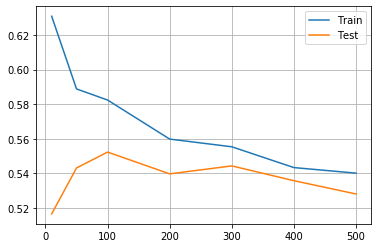

In [36]:
# Nearest neighbors
nmc = 100
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25,)
from sklearn.neighbors import KNeighborsClassifier
trainMean = []
testMean  = []
KVal = []
kneighbors = [10, 50, 100, 200, 300, 400, 500]
for k in kneighbors:
    fullModel = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    CVInfo = cross_validate(fullModel, X, y, cv=shuffle,return_train_score=True)
    print("k=",k)
    m1 = np.mean(CVInfo['train_score'])
    print(m1)
    KVal.append(k)
    trainMean.append(m1)
    m2 = np.mean(CVInfo['test_score'])
    testMean.append(m2)
    print(m2)
plt.plot(KVal,trainMean,label="Train")
plt.plot(KVal,testMean,label="Test")
plt.legend()
plt.grid()

### Slight optimum near k=100
### Overfitting is clear

# Problem 3: Random Forest

In [38]:
# Set up a grid search again
# No scaling on a forest (why?)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
nmc = 100
featureRange = np.arange(1,11)
param_grid={'max_depth':[2,4,6,8,10],'max_features':featureRange,'n_estimators':[100]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_depth','param_max_features']])

    rank_test_score  mean_test_score param_max_depth param_max_features
0                50         0.537721               2                  1
1                34         0.545195               2                  2
2                25         0.547331               2                  3
3                14         0.548994               2                  4
4                 6         0.550021               2                  5
5                12         0.549158               2                  6
6                 1         0.552628               2                  7
7                26         0.547331               2                  8
8                 5         0.550308               2                  9
9                 3         0.550534               2                 10
10               35         0.544887               4                  1
11               23         0.547413               4                  2
12               28         0.546632               4            

In [35]:
# Just a recheck at the optimal params with a sweep across tree depth
from sklearn.ensemble import RandomForestClassifier
nmc = 100
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25,)
depth = np.array([2,4,6,8])
for d in depth:
    forestModel= RandomForestClassifier(n_estimators=25,max_depth=d, max_features=7)
    CVInfo = cross_validate(forestModel, X, y, cv=shuffle,return_train_score=True)
    print("depth=",d)
    print(np.mean(CVInfo['train_score']))
    print(np.mean(CVInfo['test_score']))

depth= 2
0.5890349075975359
0.5498357289527721
depth= 4
0.6462354551676934
0.5483367556468173
depth= 6
0.7382135523613962
0.539958932238193
depth= 8
0.8392402464065707
0.5416016427104724


# Summary
My results appear to be as follows:

* For the logistic regression, optimal C = 0.01
* For KNN k = 100
* For forest, depth = 2, max_features = 7

The results suggest a near tie between all of them.  Slide advantage to the Random Forest, but not much.

Note also that all are pretty close to random guessing where accuracy = 0.5
